In [1]:
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%cd "D:\Imarticus\stat\flu from data driven"

D:\Imarticus\stat\flu from data driven


In [3]:
vaccinetrain=pd.read_csv('training_set_features.csv')

In [4]:
vaccinetest=pd.read_csv('test_set_features.csv')
vaccinetest.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [5]:
vaccinelabels=pd.read_csv('training_set_labels.csv')
# 2 dependent variables seasonal_vaccine and h1n1_vaccine
# seasonal_vaccine Balanced data
# h1n1_vaccine Imbalanced data

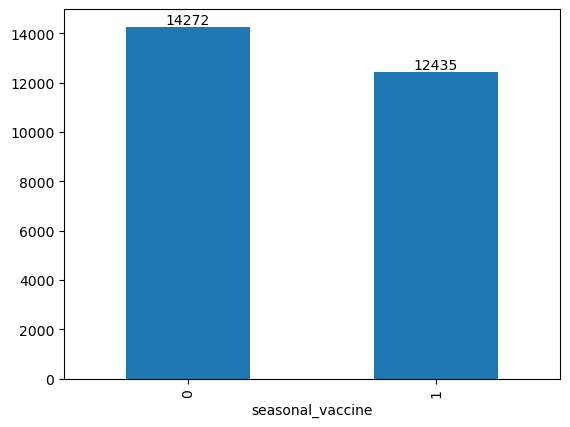

In [6]:
#seasonal vaccine -Balanced Data
ax= vaccinelabels.seasonal_vaccine.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

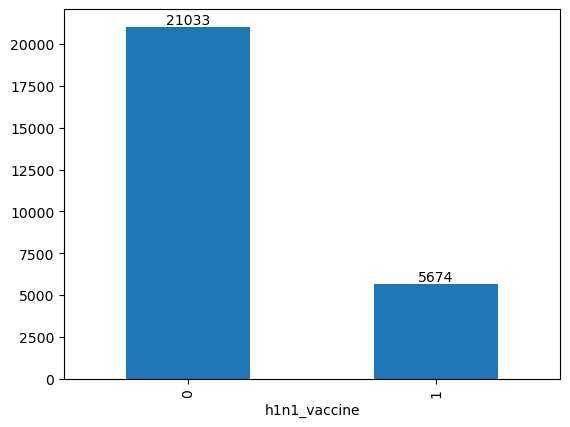

In [7]:
#h1n1 vaccine -ImBalanced Data
ax= vaccinelabels.h1n1_vaccine.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

In [8]:
vaccinetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [9]:
vaccinetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [10]:
vaccinetrain.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [11]:
vaccinetest.isnull().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [12]:
#concatinate both the dataframes for preprocessing
combinedf=pd.concat([vaccinetrain,vaccinetest],axis=0)

In [13]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_months 

In [14]:
combinedf.isnull().sum()

respondent_id                      0
h1n1_concern                     177
h1n1_knowledge                   238
behavioral_antiviral_meds        150
behavioral_avoidance             421
behavioral_face_mask              38
behavioral_wash_hands             82
behavioral_large_gatherings      159
behavioral_outside_home          164
behavioral_touch_face            256
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
chronic_med_condition           1903
child_under_6_months            1633
health_worker                   1593
health_insurance               24502
opinion_h1n1_vacc_effective      789
opinion_h1n1_risk                768
opinion_h1n1_sick_from_vacc      770
opinion_seas_vacc_effective      914
opinion_seas_risk               1013
opinion_seas_sick_from_vacc     1058
age_group                          0
education                       2814
race                               0
sex                                0
income_poverty                  8920
m

In [17]:
combinedf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [18]:
combinedf=combinedf.drop('respondent_id',axis=1)

In [19]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
original=combinedf

In [22]:
mask=combinedf.isnull()

In [23]:
mask.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
combinedf=combinedf.astype(str).apply(LabelEncoder().fit_transform)

In [25]:
combinedf=combinedf.where(~mask,original)

In [26]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,...,2,1,0,1,8,2,0,0,NaN,NaN
1,3,2,0,1,0,1,0,1,1,0,...,2,1,1,0,1,0,0,0,13,20
2,1,1,0,1,0,0,0,0,0,NaN,...,0,1,0,0,9,0,2,0,15,22
3,1,1,0,1,0,1,1,0,0,0,...,2,1,1,1,5,1,0,0,NaN,NaN
4,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,9,0,1,0,19,5


In [27]:
vaccinetrain.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

In [29]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),initial_strategy='most_frequent',max_iter=50)

combinedf_impute=imputer.fit_transform(combinedf)

combinedf_impute=pd.DataFrame(combinedf_impute,columns=combinedf.columns)

combinedf_impute.info()

combinedf_impute.to_csv('vaccineimp.csv')

In [30]:
combinedf_impute=pd.read_csv('vaccineimpute.csv')

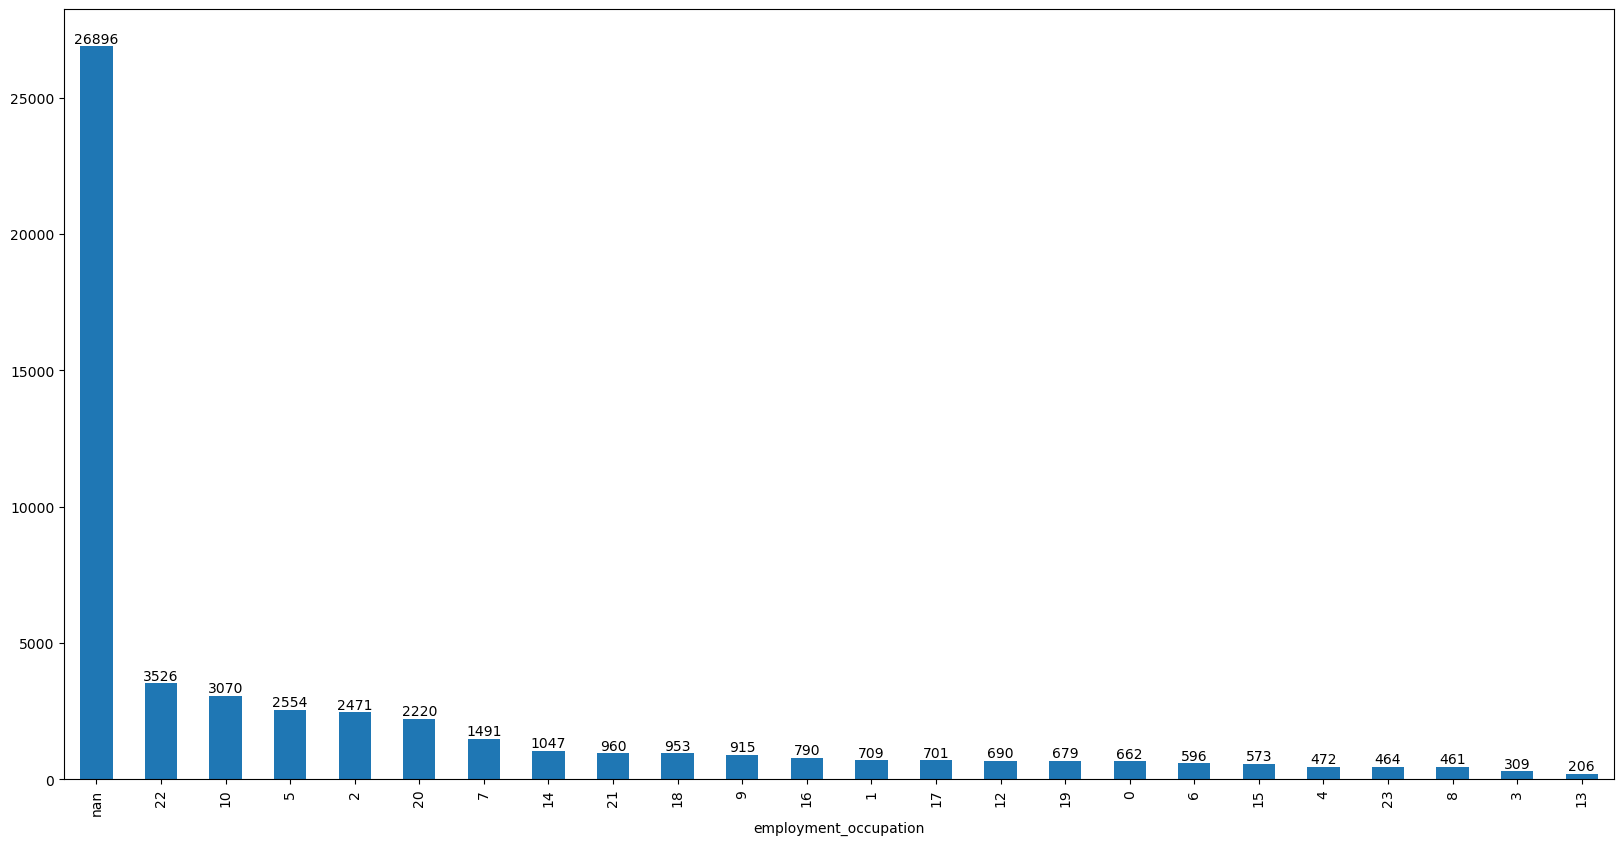

In [31]:
plt.figure(figsize=(20,10))
ax=combinedf.employment_occupation.value_counts(dropna=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

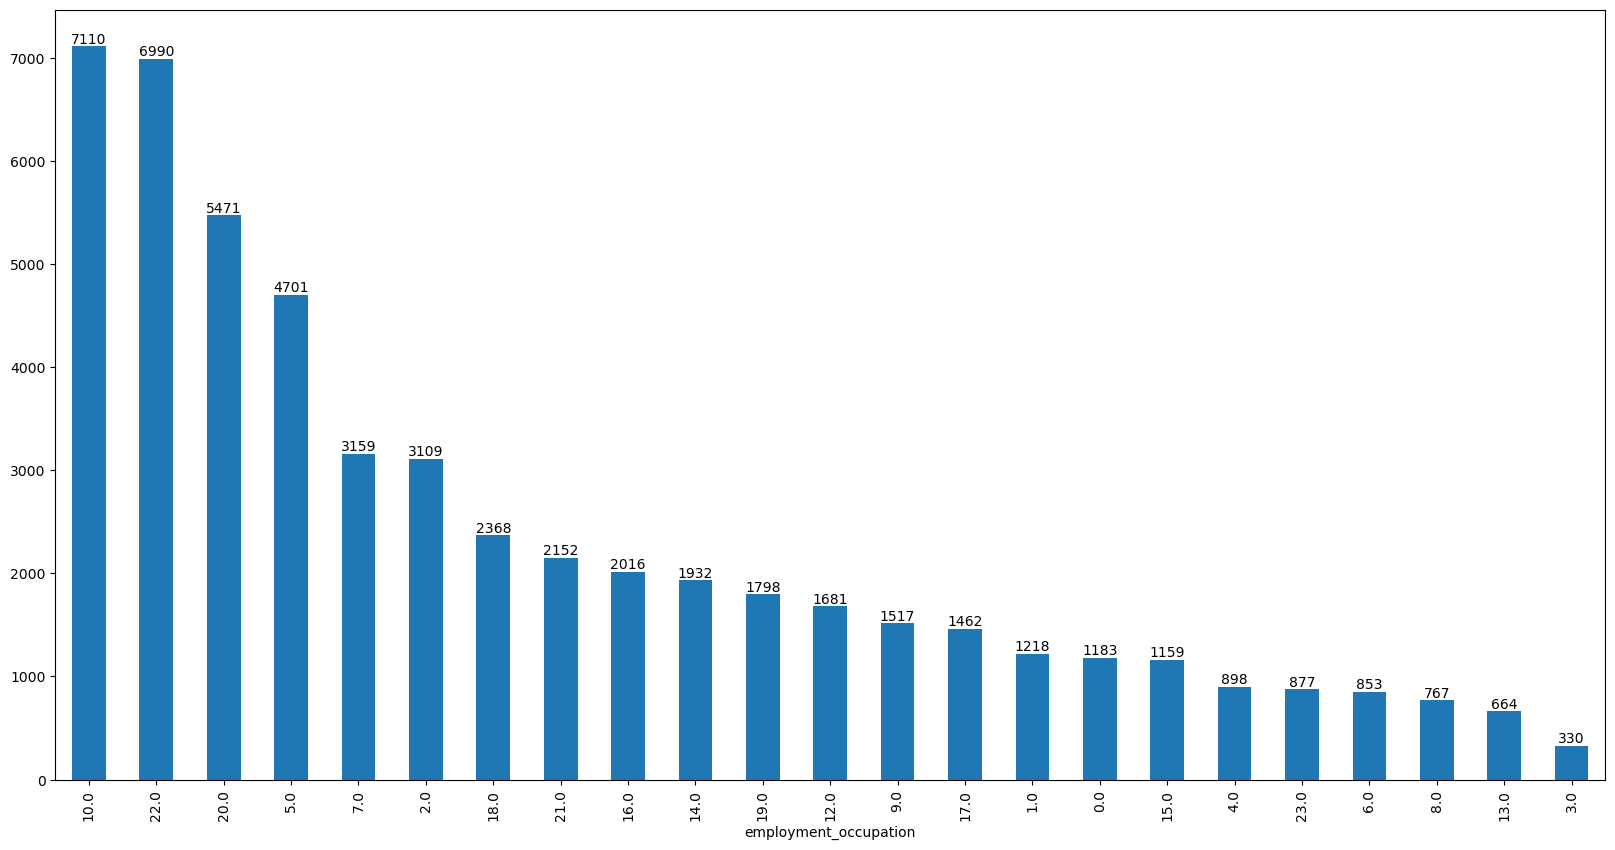

In [32]:
plt.figure(figsize=(20,10))
ax=combinedf_impute.employment_occupation.value_counts(dropna=False).plot(kind='bar')
for i in ax.containers:
  ax.bar_label(i)

In [33]:
#split data back to train and test
vaccinetrain_df=combinedf_impute.loc[0:26706]
vaccinetest_df=combinedf_impute.loc[26707:53414]

In [34]:
print(vaccinetrain_df.shape)
print(vaccinetest_df.shape)

(26707, 36)
(26708, 36)


In [35]:
y=vaccinelabels.seasonal_vaccine
X=vaccinetrain_df

# EDA using vaccinetrain_df
# Pie Diagram of sex

<Axes: ylabel='count'>

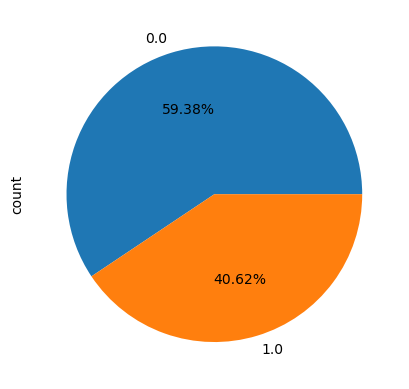

In [36]:
vaccinetrain_df.sex.value_counts().plot(kind='pie',autopct='%0.2f%%')

# Pie Diagram of education

<Axes: ylabel='count'>

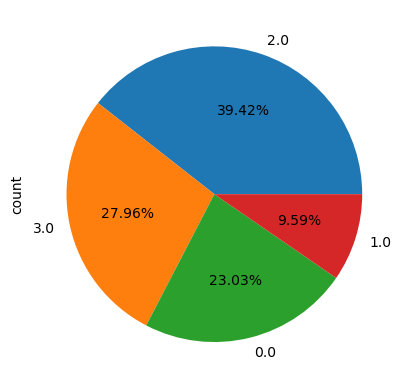

In [37]:
vaccinetrain_df.education.value_counts().plot(kind='pie',autopct='%0.2f%%')

# Pie Diagram of marital_status

<Axes: ylabel='count'>

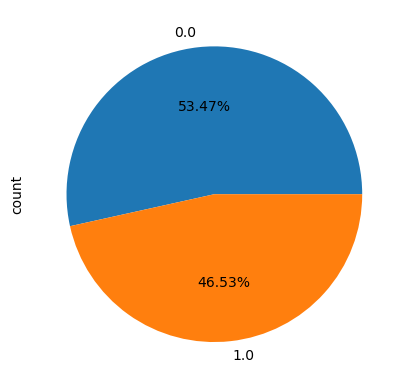

In [38]:
vaccinetrain_df.marital_status.value_counts().plot(kind='pie',autopct='%0.2f%%')

# Pie Diagram of health_insurance

<Axes: ylabel='count'>

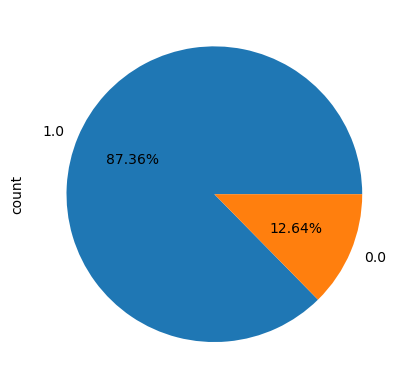

In [39]:
vaccinetrain_df.health_insurance.value_counts().plot(kind='pie',autopct='%0.2f%%')

# Stacked Bar Plots - h1n1_concern & sex

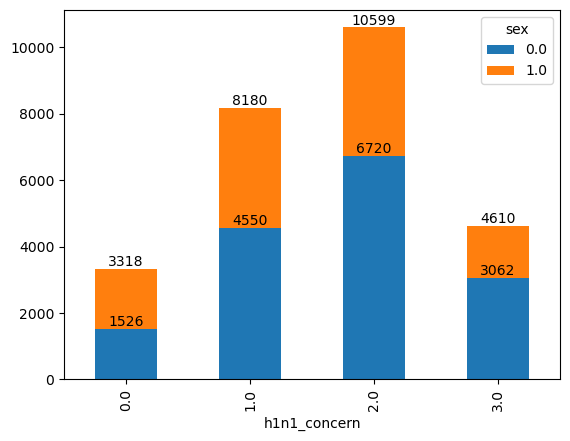

In [40]:
ax=pd.crosstab(vaccinetrain_df.h1n1_concern,vaccinetrain_df.sex).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

# Stacked Bar Plots of h1n1knowledge & race

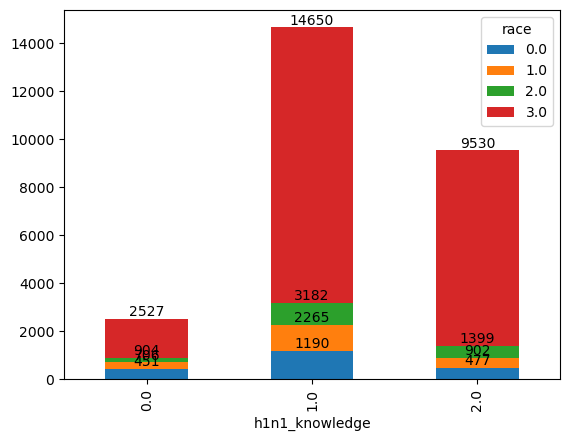

In [41]:
ax=pd.crosstab(vaccinetrain_df.h1n1_knowledge,vaccinetrain_df.race).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

# Stacked Bar Plots of health_insurance & employment_status

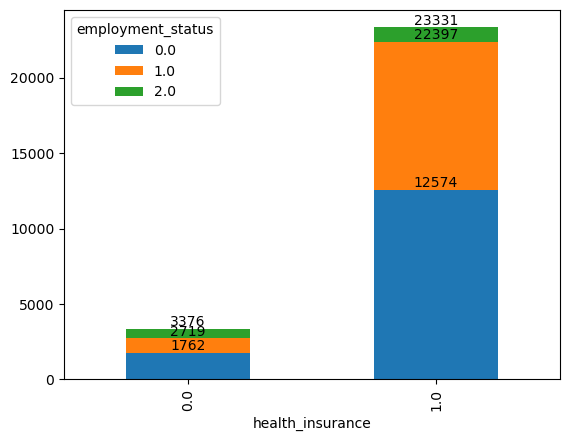

In [42]:
ax=pd.crosstab(vaccinetrain_df.health_insurance,vaccinetrain_df.employment_status).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

# Stacked Bar Plots of health_worker & h1n1knowledge

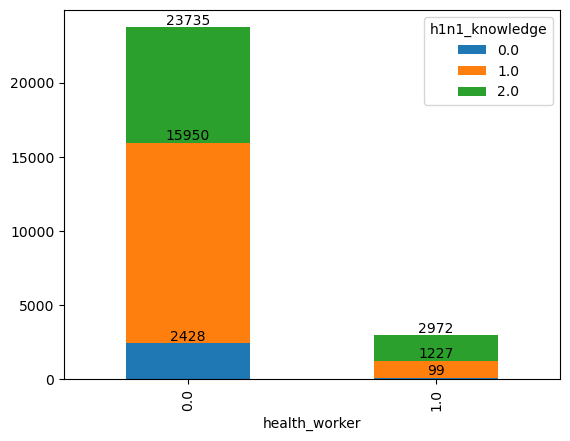

In [43]:
ax=pd.crosstab(vaccinetrain_df.health_worker,vaccinetrain_df.h1n1_knowledge).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

# Hypothesis Testing
# Test Null No Association between seasonal_vaccine & h1n1concern

In [44]:
from scipy.stats import chi2_contingency

In [45]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.h1n1_concern))
#since pvalue=3.075121463735956e-143 is less than 0.05, Reject Null Hypothesis

Chi2ContingencyResult(statistic=662.3398566811071, pvalue=3.075121463735956e-143, dof=3, expected_freq=array([[1773.11176845, 4371.32437189, 5664.01797282, 2463.54588685],
       [1544.88823155, 3808.67562811, 4934.98202718, 2146.45411315]]))

# Test Null No Association between seasonal_vaccine & h1n1knowledge

In [46]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.h1n1_knowledge))
# since pvalue=3.350706141408485e-86 is less than 0.05, Reject Null Hypothesis

Chi2ContingencyResult(statistic=393.6262937707672, pvalue=3.350706141408485e-86, dof=2, expected_freq=array([[1350.40790804, 7828.83888119, 5092.75321077],
       [1176.59209196, 6821.16111881, 4437.24678923]]))

# Test Null No Association between seasonal_vaccine & health_worker

In [47]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.health_worker))
# since pvalue=1.0854198362462328e-90 is less than 0.05, Reject Null Hypothesis

Chi2ContingencyResult(statistic=407.83406567608836, pvalue=1.0854198362462328e-90, dof=1, expected_freq=array([[12683.787771,  1588.212229],
       [11051.212229,  1383.787771]]))

# Test Null No Association between seasonal_vaccine & sex

In [48]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.sex))
# since pvalue=2.5248076319253385e-36 is less than 0.05, Reject Null Hypothesis

Chi2ContingencyResult(statistic=158.40462897107128, pvalue=2.5248076319253385e-36, dof=1, expected_freq=array([[8474.38409406, 5797.61590594],
       [7383.61590594, 5051.38409406]]))

# Test Null No Association between seasonal_vaccine & employment_status

In [49]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.employment_status))
# since pvalue=2.025009980035016e-137 is less than 0.05, Reject Null Hypothesis

Chi2ContingencyResult(statistic=629.4971662224511, pvalue=2.025009980035016e-137, dof=2, expected_freq=array([[7661.03987719, 5760.7428764 ,  850.21724641],
       [6674.96012281, 5019.2571236 ,  740.78275359]]))

# Test Null No Association between seasonal_vaccine & education

In [50]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.education))
# since pvalue=1.4457296332155637e-30 is less than 0.05, Reject Null Hypothesis

Chi2ContingencyResult(statistic=141.9356130578041, pvalue=1.4457296332155637e-30, dof=3, expected_freq=array([[3287.04354664, 1368.57722694, 5626.07615981, 3990.30306661],
       [2863.95645336, 1192.42277306, 4901.92384019, 3476.69693339]]))

In [51]:
# build the following models, score, predict, confussion matrix, classification report, roc curve
# a) Binary Logistic Regression
# b) Decision Tree
# c) RandomForest (500 trees)
# d) Gradientboosting (500 trees)
# e) naive bayes 
# f) support vector machine

## Binary Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
reg=LogisticRegression(max_iter=2000)

In [54]:
reg_model=reg.fit(X,y)

In [55]:
reg_model.score(X,y)

0.7444490208559553

In [56]:
logitpredict=reg_model.predict(X)

In [57]:
pd.crosstab(y,logitpredict)

col_0,0,1
seasonal_vaccine,,
0,10968,3304
1,3521,8914


In [58]:
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [59]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76     14272
           1       0.73      0.72      0.72     12435

    accuracy                           0.74     26707
   macro avg       0.74      0.74      0.74     26707
weighted avg       0.74      0.74      0.74     26707



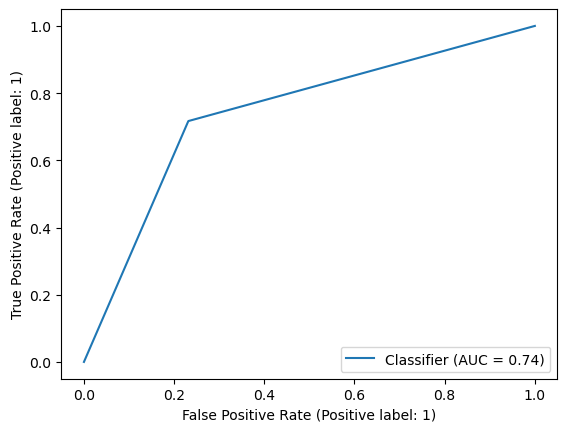

In [60]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [61]:
cross_val_score(reg,X,y)

array([0.73586672, 0.73343317, 0.75173189, 0.76202958, 0.73132372])

In [62]:
np.mean([0.73586672, 0.73343317, 0.75173189, 0.76202958, 0.73132372])

0.7428770159999999

## Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
treecla=DecisionTreeClassifier(max_depth=10)

In [65]:
treecla_model=treecla.fit(X,y)

In [66]:
treecla_model.score(X,y)

0.8155914179803048

In [67]:
cross_val_score(treecla,X,y)

array([0.6785848 , 0.74073381, 0.74985958, 0.75528927, 0.71765587])

In [68]:
np.mean([0.73736428, 0.74840884, 0.76277851, 0.76876989, 0.74892342])

0.753248988

In [69]:
treepredict=treecla_model.predict(X)

In [70]:
pd.crosstab(y,treepredict)

col_0,0,1
seasonal_vaccine,,
0,12250,2022
1,2903,9532


In [71]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83     14272
           1       0.82      0.77      0.79     12435

    accuracy                           0.82     26707
   macro avg       0.82      0.81      0.81     26707
weighted avg       0.82      0.82      0.81     26707



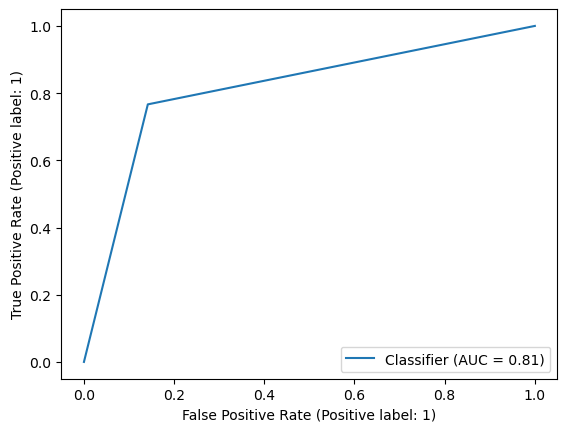

In [72]:
RocCurveDisplay.from_predictions(y,treepredict)

## Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=10)

In [75]:
rfmodel=rf.fit(X,y)

In [76]:
rfmodel.score(X,y)

0.8261878908151421

In [77]:
cross_val_score(rf,X,y)

array([0.77480344, 0.7721827 , 0.77831867, 0.78000374, 0.77457405])

In [78]:
np.mean([0.77630101, 0.77442905, 0.77831867, 0.7785059 , 0.77513574])

0.776538074

In [79]:
rfpredict=rfmodel.predict(X)

In [80]:
print(classification_report(y,rfpredict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     14272
           1       0.83      0.79      0.81     12435

    accuracy                           0.83     26707
   macro avg       0.83      0.82      0.82     26707
weighted avg       0.83      0.83      0.83     26707



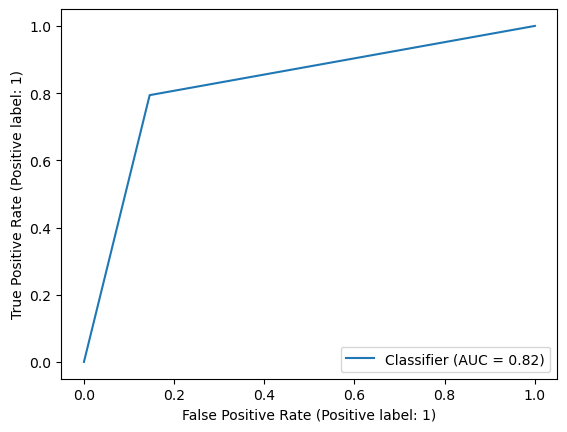

In [81]:
RocCurveDisplay.from_predictions(y,rfpredict)

# GradientBoosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
gbm=GradientBoostingClassifier(n_estimators=3000)

In [84]:
gbmmodel=gbm.fit(X,y)

In [85]:
gbm.score(X,y)

0.8743400606582544

In [86]:
gbmpredict=gbm.predict(X)

In [87]:
pd.crosstab(y,gbmpredict)

col_0,0,1
seasonal_vaccine,,
0,12639,1633
1,1723,10712


print()

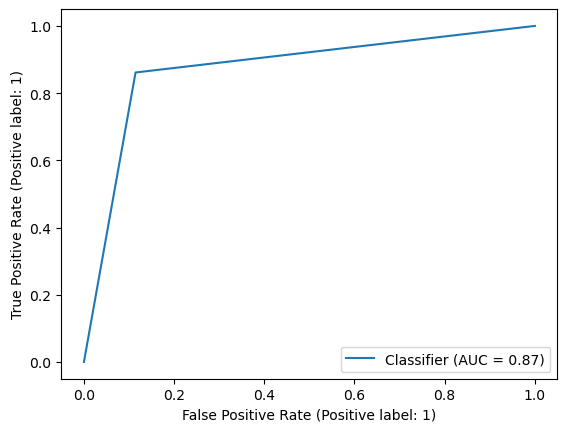

In [88]:
RocCurveDisplay.from_predictions(y,gbmpredict)

## Naive Bayes

In [89]:
from sklearn.naive_bayes import CategoricalNB

In [90]:
nb=CategoricalNB()

In [91]:
nbmodel=nb.fit(X,y)

In [92]:
nbmodel.score(X,y)

0.8188489909012618

In [93]:
nbpredict=nbmodel.predict(X)

In [94]:
pd.crosstab(y,nbpredict)

col_0,0,1
seasonal_vaccine,,
0,11787,2485
1,2353,10082


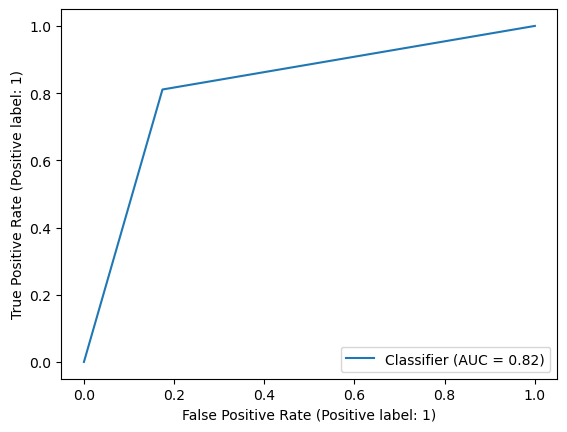

In [95]:
RocCurveDisplay.from_predictions(y,nbpredict)

## SVC

In [96]:
from sklearn.svm import SVC

In [97]:
svm=SVC(C=3)

In [98]:
svmmodel=svm.fit(X,y)

In [99]:
svmmodel.score(X,y)

0.5343917325045868

In [100]:
svmpredict=svmmodel.predict(X)

In [101]:
pd.crosstab(y,svmpredict)

col_0,0
seasonal_vaccine,
0,14272
1,12435


In [102]:
print(classification_report(y,svmpredict))

              precision    recall  f1-score   support

           0       0.53      1.00      0.70     14272
           1       0.00      0.00      0.00     12435

    accuracy                           0.53     26707
   macro avg       0.27      0.50      0.35     26707
weighted avg       0.29      0.53      0.37     26707



C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


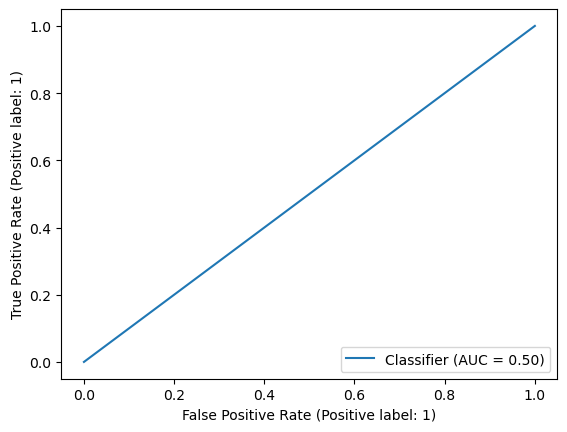

In [103]:
RocCurveDisplay.from_predictions(y,svmpredict)

In [106]:
test_seasonal=gbmmodel.predict_proba(vaccinetest_df)

In [107]:
pd.DataFrame(test_seasonal).to_csv('gbm_seasonal.csv')

In [108]:
test_seasonal=rfmodel.predict_proba(vaccinetest_df)

In [110]:
pd.DataFrame(test_seasonal).to_csv('rf_seasonal.csv')

In [112]:
test_seasonal=reg_model.predict_proba(vaccinetest_df)

In [113]:
pd.DataFrame(test_seasonal).to_csv('reg_seasonal.csv')